In [29]:
#Using sentiment analysis through Tweets to help figure out what problems United Airlines is having on their flights

In [30]:
import pandas as pd 
import nltk
#Disables a warning message from Pandas that is not affected by this project
pd.options.mode.chained_assignment = None  # default='warn'

In [31]:
df = pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [32]:
#Filtering out everything that is not United Airlines
Airline = ["United"]
df1 = df[df.airline.isin(Airline)]
df1.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
504,570307876897628160,positive,1.0000,NaN,NaN,United,NaN,rdowning76,NaN,0,@united thanks,NaN,2015-02-24 11:42:48 -0800,usa,NaN
505,570307847281614848,positive,1.0000,NaN,NaN,United,NaN,CoreyAStewart,NaN,0,@united Thanks for taking care of that MR!! Ha...,NaN,2015-02-24 11:42:41 -0800,"Richmond, VA",Eastern Time (US & Canada)
506,570307109704900608,negative,1.0000,Cancelled Flight,0.703,United,NaN,CoralReefer420,NaN,0,@united still no refund or word via DM. Please...,NaN,2015-02-24 11:39:45 -0800,"Bay Area, California",Alaska
507,570307026263384064,negative,1.0000,Late Flight,1.000,United,NaN,lsalazarll,NaN,0,@united Delayed due to lack of crew and now de...,NaN,2015-02-24 11:39:25 -0800,NaN,Mountain Time (US & Canada)
508,570306733010264064,positive,0.3441,NaN,0.000,United,NaN,rombaa,NaN,0,@united thanks -- we filled it out. How's our ...,NaN,2015-02-24 11:38:15 -0800,NaN,NaN


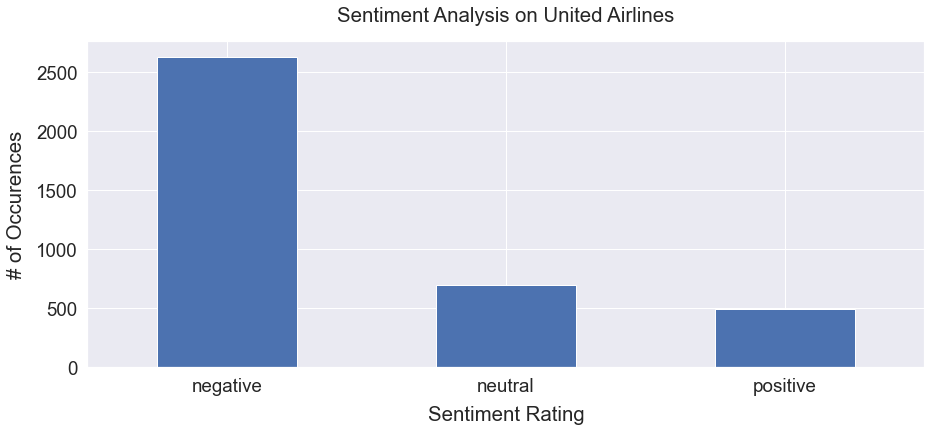

In [33]:
#Generate a bar graph based on the Senitment Analysis in the dataset
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.7)
df1['airline_sentiment'].value_counts().plot(kind='bar', figsize=(15,6), rot = 0)
plt.xlabel("Sentiment Rating", labelpad = 10)
plt.ylabel("# of Occurences", labelpad = 10)
plt.title("Sentiment Analysis on United Airlines", y = 1.0420)
sns.set(color_codes=True)

In [34]:
#Cleaning the data down to the OriginalTweet and Sentiment 
df2 = df1[['airline_sentiment', 'negativereason', 'airline', 'name', 'text']]
#Converting all text to lowercase
df2['text']= df2['text'].str.lower()
df2.head()

,airline_sentiment,negativereason,airline,name,text
504,positive,NaN,United,rdowning76,@united thanks
505,positive,NaN,United,CoreyAStewart,@united thanks for taking care of that mr!! ha...
506,negative,Cancelled Flight,United,CoralReefer420,@united still no refund or word via dm. please...
507,negative,Late Flight,United,lsalazarll,@united delayed due to lack of crew and now de...
508,positive,NaN,United,rombaa,@united thanks -- we filled it out. how's our ...


In [35]:
from nltk.tokenize import word_tokenize
def identify_tokens(row):
    Tweet = row['text']
    tokens = nltk.word_tokenize(Tweet)
    # Filtering out all punctuation in the data
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df2['text'] = df2.apply(identify_tokens, axis=1)

print(df2["text"])

504                                      [united, thanks]
505     [united, thanks, for, taking, care, of, that, ...
506     [united, still, no, refund, or, word, via, dm,...
507     [united, delayed, due, to, lack, of, crew, and...
508     [united, thanks, we, filled, it, out, how, our...
                              ...                        
4321    [united, link, to, current, status, of, fly, t...
4322    [united, i, like, delays, less, than, you, bec...
4323    [united, and, do, hope, for, me, having, a, ni...
4324    [united, the, we, got, into, the, gate, at, ia...
4325    [united, yes, we, waited, in, line, for, almos...
Name: text, Length: 3822, dtype: object


In [36]:
#Removing the stop words from the tokenized tweets
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))
def remove_stops(row):
    my_list = row['text']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

df2['stem_meaningful'] = df2.apply(remove_stops, axis=1)

print(df2['stem_meaningful'])

504                                      [united, thanks]
505     [united, thanks, taking, care, mr, happy, cust...
506     [united, still, refund, word, via, dm, please,...
507     [united, delayed, due, lack, crew, delayed, lo...
508                [united, thanks, filled, luck, common]
                              ...                        
4321    [united, link, current, status, fly, morning, ...
4322    [united, like, delays, less, one, plane, conne...
4323    [united, hope, nicer, flight, time, try, thing...
4324    [united, got, gate, iah, time, given, seats, c...
4325    [united, yes, waited, line, almost, hour, pass...
Name: stem_meaningful, Length: 3822, dtype: object


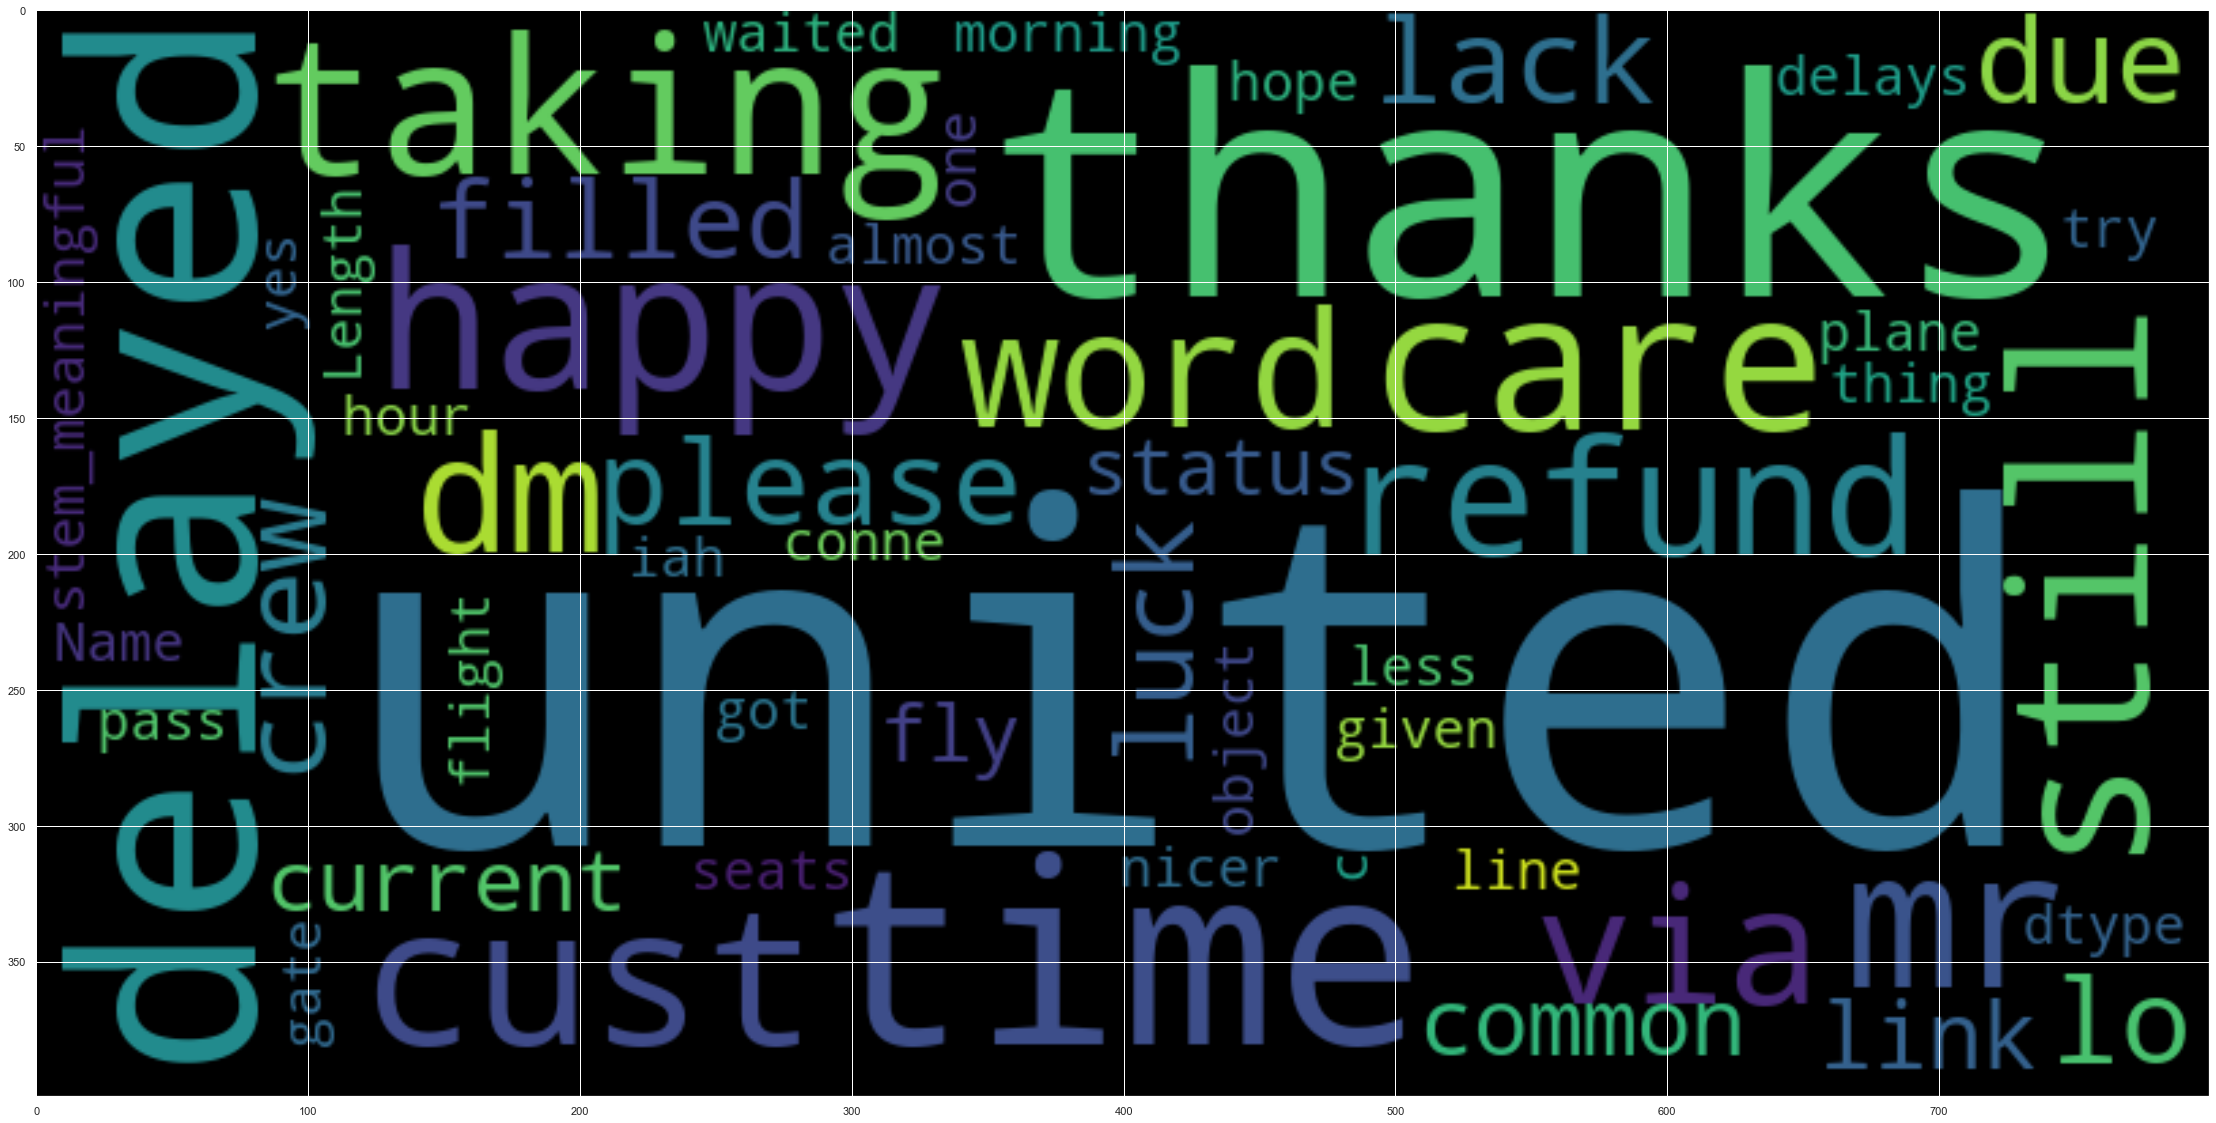

In [37]:
#Visualize the data by sorting it into a wordcloud 
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator

text =df2['stem_meaningful']

# This is how we generate the constraints of the image

wordcloud = WordCloud(background_color="black", width=800, height=400).generate(str(text))

# Display the wordcloud!!!:

plt.figure( figsize=(50,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

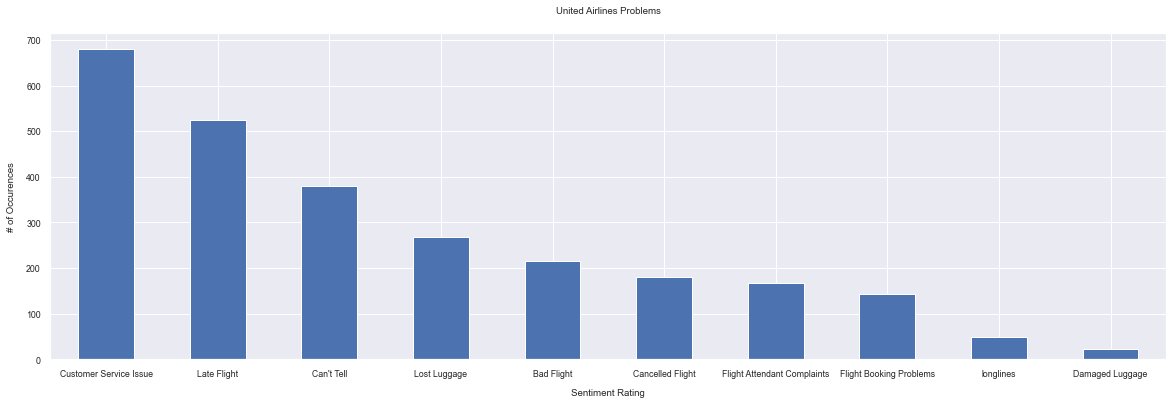

In [38]:
#Generate a bar graph based on the Senitment Analysis in the dataset
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 0.8)
df1['negativereason'].value_counts().plot(kind='bar', figsize=(20,6), rot = 0)
plt.xlabel("Sentiment Rating", labelpad = 10)
plt.ylabel("# of Occurences", labelpad = 10)
plt.title("United Airlines Problems", y = 1.0420)
sns.set(color_codes=True)